In [1]:
import MCtools
from getdist import plots, MCSamples
import warnings
warnings.filterwarnings("ignore")
DBdir = "/sps/planck/Users/tristram/Soft/LiteBIRD/Reio/chains"
MCtools.parname["reionization_width"] = "$\Delta z$"

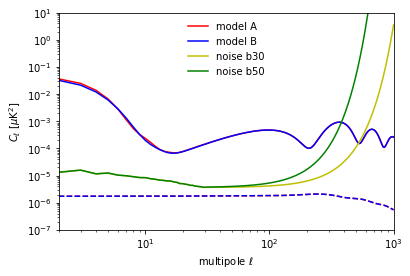

In [2]:
#noise
DATAdir = "/sps/planck/Users/tristram/Soft/LiteBIRD/Reio/modules/data/litebird"
modelA = np.loadtxt(f"{DATAdir}/model_A_cl_lensed.dat").T
modelB = np.loadtxt(f"{DATAdir}/model_B_cl_lensed.dat").T
noise30 = np.loadtxt( f"{DATAdir}/noise_litebird_only_b30.dat").T
noise50 = np.loadtxt( f"{DATAdir}/noise_litebird_only_b50.dat").T
c2d = modelA[0]*(modelA[0]+1)/2/pi
figure()
plot( modelA[0], modelA[2]*(2.725e6)**2/c2d, 'r', label="model A")
plot( modelB[0], modelB[2]*(2.725e6)**2/c2d, 'b', label="model B")
plot( modelA[0], modelA[4]*(2.725e6)**2/c2d, 'r--')
plot( modelB[0], modelB[4]*(2.725e6)**2/c2d, 'b--')
plot( noise30[0], noise30[2], 'y', label="noise b30")
plot( noise50[0], noise50[2], 'g', label="noise b50")
xlim(2,1000)
ylim(1e-7,1e1)
loglog()
ylabel( "$C_\ell$ [$\mu$K$^2$]")
xlabel( "multipole $\ell$")
legend()

# Reionization optical depth

lb_reio_A_b30_f65: 1681  1761  1521  1681 
lb_reio_B_b30_f65: 1601  2961  3201  1281 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

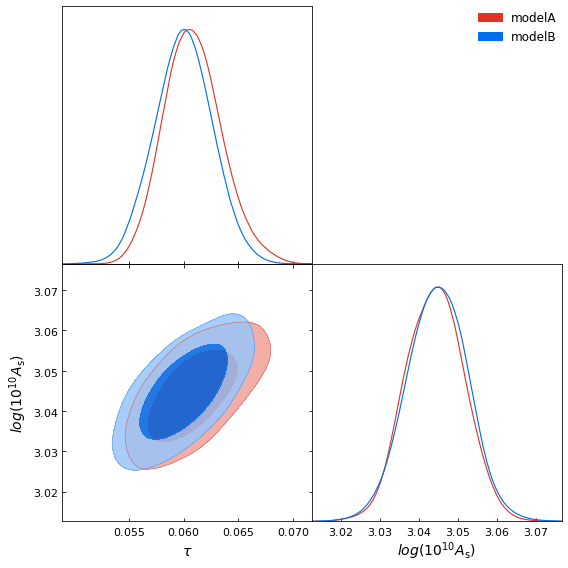

In [3]:
#runnames = ["lb_reio_A_30arcmin","lb_reio_B_30arcmin"]
runnames = ["lb_reio_A_b30_f65","lb_reio_B_b30_f65"]
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.4) for run in runnames]
listpar = ['tau','logA']
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [4]:
MCtools.PrintMax( chains, 'tau')

tau             =  0.060691 +/- 0.002661  |   0.059983 +/- 0.002614


# Reionization redshift

lb_zreio_A_b30_f65: 1521  2081  2641  1761 
lb_zreio_B_b30_f65: 2001  1681  1681  2881 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

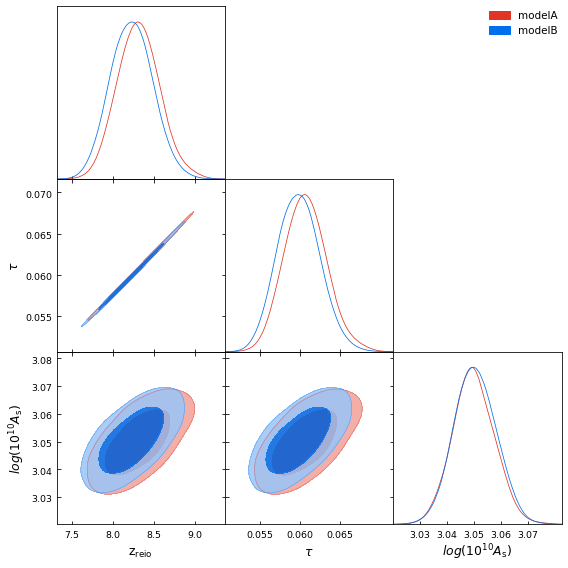

In [5]:
#runnames = ["lb_zreio_A_30arcmin","lb_zreio_B_30arcmin"]
runnames = ["lb_zreio_A_b30_f65","lb_zreio_B_b30_f65"]
listpar = ['z_reio','tau','logA']
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.4) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [6]:
for par in ['tau','z_reio']: MCtools.PrintMax( chains, par)

tau             =  0.060649 +/- 0.002656  |   0.059840 +/- 0.002616
z_reio          =  8.304019 +/- 0.261193  |   8.224341 +/- 0.258371


# Reionization redshift + width

lb_zdz_A_b30_f65: 4801  4801  5761  2761 
lb_zdz_B_b30_f65: 3241  4201  5161  3481 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

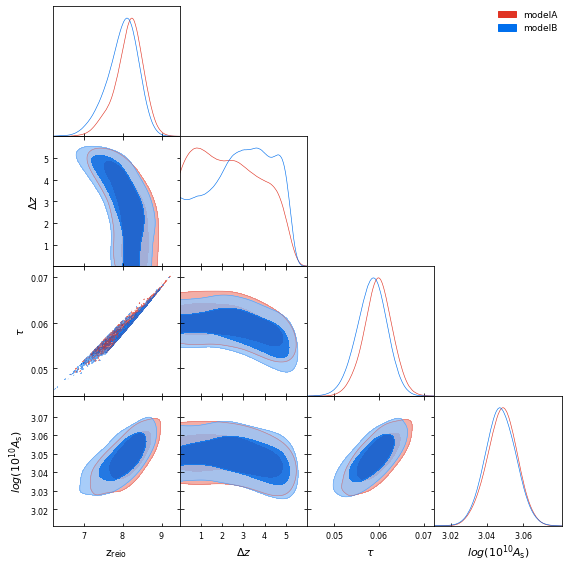

In [7]:
runnames = ["lb_zdz_A_b30_f65","lb_zdz_B_b30_f65"]
listpar = ['z_reio','reionization_width','tau','logA']
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.4) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
support = {'reionization_width':[0,6]}
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [8]:
for par in ['tau','z_reio','reionization_width']: MCtools.PrintMax( chains, par)

tau             =  0.059820 +/- 0.003109  |   0.058513 +/- 0.003343
z_reio          =  8.193499 +/- 0.351692  |   8.032783 +/- 0.402681
reionization_width =  2.338957 +/- 1.692498  |   3.004519 +/- 1.675103


# Sky fraction

lb_reio_A_b30_f55: 1521  2001  2001  881 
lb_reio_A_b30_f65: 1681  1761  1521  1681 
lb_reio_A_b30_f75: 3921  3361  3361  1761 
lb_reio_A_b30_f85: 2161  1441  1921  3521 
lb_reio_A_b30_f95: 2241  2881  1921  1761 
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

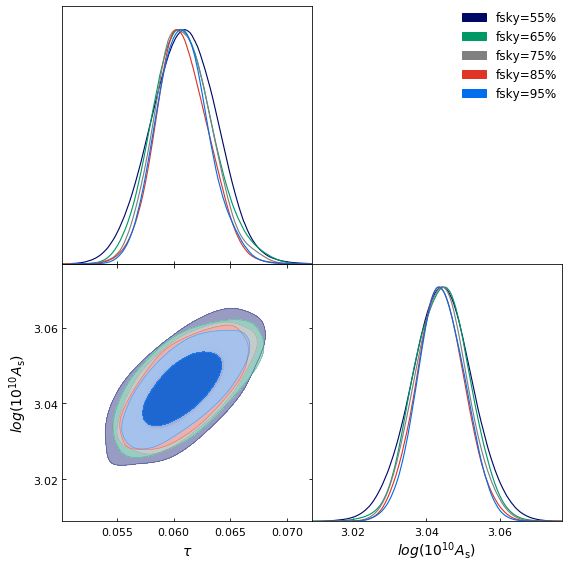

In [9]:
fsky = [55,65,75,85,95]
runnames = [f"lb_reio_A_b30_f{f}" for f in fsky]
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.4) for run in runnames]
listpar = ['tau','logA']
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = [f"fsky={f}%" for f in fsky],legend_loc = 'upper right')

In [10]:
for i,chain in enumerate(chains): 
    print( "fsky={}, tau={:.5f} +/- {:.5f}" .format(fsky[i], *MCtools.MaxPosterior(chain, 'tau', symmetrical=True)))

fsky=55, tau=0.06090 +/- 0.00293
fsky=65, tau=0.06069 +/- 0.00266
fsky=75, tau=0.06079 +/- 0.00242
fsky=85, tau=0.06063 +/- 0.00230
fsky=95, tau=0.06074 +/- 0.00222


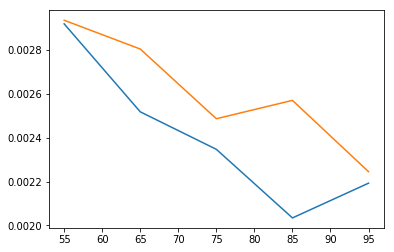

In [11]:
#errorbar( fsky, [MCtools.MaxPosterior(c, 'tau')[0] for c in chains], array([MCtools.MaxPosterior(c, 'tau')[1:] for c in chains]).T, marker='o')
plot( fsky, [-MCtools.MaxPosterior(c, 'tau')[1] for c in chains])
plot( fsky, [MCtools.MaxPosterior(c, 'tau')[2] for c in chains])